In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from dash_model_two import *
from feature_selection import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

### biomarkers_____VS_____final diagnosischanges of each patient in each phase


#### sleep_brain_finaldxch.csv
#### 

In [2]:
com_col = ['Phase', 'RID', 'VISCODE','PTID','RID_Phase']
target = 'final_dxch'

In [3]:
sleep_brain_finaldxch = pd.read_csv('sleep_brain_finaldxch.csv').iloc[:,1:].drop(['NPIKSEV'],axis=1)
sleep_brain_finaldxch = sleep_brain_finaldxch[sleep_brain_finaldxch['final_dxch'].notna()].reset_index().drop(['index'],axis=1)   # keep the rows where DXCHANGE is not nan
sleep_brain_finaldxch

,RID,Phase,VISCODE,PTID,RID_Phase,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,...,ratio_PTAU_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year,ABETA_reduction_per_year,TAU_reduction_per_year,PTAU_reduction_per_year
0,2,ADNI2,v06,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ADNI2,v11,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ADNI2,v21,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,ADNI2,v41,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,ADNI2,v51,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,6978,ADNI3,y1,021_S_6978,6978_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14741,6999,ADNI3,m12,035_S_6999,6999_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14742,6999,ADNI3,y1,035_S_6999,6999_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14743,7000,ADNI3,m12,035_S_7000,7000_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sleep_brain_finaldxch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14745 entries, 0 to 14744
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RID                             14745 non-null  int64  
 1   Phase                           14745 non-null  object 
 2   VISCODE                         13649 non-null  object 
 3   PTID                            14745 non-null  object 
 4   RID_Phase                       14745 non-null  object 
 5   NPIK1                           884 non-null    float64
 6   NPIK2                           883 non-null    float64
 7   NPIK3                           882 non-null    float64
 8   NPIK4                           882 non-null    float64
 9   NPIK5                           882 non-null    float64
 10  NPIK6                           883 non-null    float64
 11  NPIK7                           883 non-null    float64
 12  NPIK8                           

In [5]:
sleep_brain_finaldxch.columns

Index(['RID', 'Phase', 'VISCODE', 'PTID', 'RID_Phase', 'NPIK1', 'NPIK2',
       'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A',
       'NPIK9B', 'NPIK9C', 'NPIKTOT', 'insomnia', 'OSA', 'final_dxch',
       'DXCHANGE', 'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl',
       'Ventricles_reduction_per_year', 'Hippocampus_reduction_per_year',
       'wholebrain_reduction_per_year', 'Entorhinal_reduction_per_year',
       'Fusiform_reduction_per_year', 'ICV_reduction_per_year',
       'ABETA_reduction_per_year', 'TAU_reduction_per_year',
       'PTAU_reduction_per_year'],
      dtype='object')

### biomarker______VS______final_dxch

In [4]:
col_lst = [ 'final_dxch','NPIK1', 'NPIK2',
       'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A',
       'NPIK9B', 'NPIK9C', 'NPIKTOT', 'insomnia', 'OSA']
bio_lst = [ 'final_dxch','ratio_ABETA_bl', 'ratio_TAU_bl','ratio_PTAU_bl']
sleep_dxch = sleep_brain_finaldxch[com_col + col_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()
#biomarkers to dxch
bio_dxch = sleep_brain_finaldxch[com_col + bio_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()
df = bio_dxch.copy()

In [5]:
np.sum(df.isna())   # check nan

Phase             0
RID               0
VISCODE           0
PTID              0
RID_Phase         0
final_dxch        0
ratio_ABETA_bl    0
ratio_TAU_bl      0
ratio_PTAU_bl     0
dtype: int64

In [6]:
df.groupby(target).count()

,Phase,RID,VISCODE,PTID,RID_Phase,ratio_ABETA_bl,ratio_TAU_bl,ratio_PTAU_bl
final_dxch,,,,,,,,
AD-AD,115,115,115,115,115,115,115,115
CN-AD,25,25,25,25,25,25,25,25
CN-CN,99,99,99,99,99,99,99,99
CN-MCI,30,30,30,30,30,30,30,30
MCI-AD,183,183,183,183,183,183,183,183
MCI-CN,8,8,8,8,8,8,8,8
MCI-MCI,122,122,122,122,122,122,122,122


- unselect the labels with too little data: AD-MCI, CN-AD, CN-MCI, MCI-CN
- the possible groups: ['CN-CN','MCI-AD', 'MCI-MCI','AD-AD']

In [7]:
df_2g = df.loc[df[target].isin(['MCI-AD', 'MCI-MCI'])].reset_index().drop(['index'],axis=1)
df_2g.shape

(305, 9)

In [8]:
df_3g = df.loc[df[target].isin(['CN-AD', 'CN-CN','CN-MCI'])].reset_index().drop(['index'],axis=1)
df_3g.shape

(154, 9)

### undersampling and modeling

- functions
    - models(df,drop_lst,target) : under sampling, split, scale, pca, models
    - cv_models(df,drop_lst,target,k): under sampling, NOT SPLIT, scale, pca, models with cross-validation 

In [9]:
drop_lst = ['Phase', 'RID', 'VISCODE', 'PTID','RID_Phase',target]
k=10

In [10]:
models(df_2g,drop_lst,target)

After undersampling data size is 244 ; Resampled dataset shape Counter({'MCI-AD': 122, 'MCI-MCI': 122})

1 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.673, Test set f1-score: 0.639
          - saga_L1, Training set f1-score:0.673, Test set f1-score: 0.639
          - newton-cg_L2, Training set f1-score:0.673, Test set f1-score: 0.639
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.673, Test set f1-score: 0.639
          - saga_L1, Training set f1-score:0.660, Test set f1-score: 0.693
          - newton-cg_L2, Training set f1-score:0.673, Test set f1-score: 0.639
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.640, Test set f1-score: 0.546
          - saga_L1, Training set f1-score:0.673, Test set f1-score: 0.639
    

          - 10trees. f1-score on training data: 0.969 f1-score on test data: 0.595
          - 15trees. f1-score on training data: 0.990 f1-score on test data: 0.573
          - 20trees. f1-score on training data: 1.000 f1-score on test data: 0.576
          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.552
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.518
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.492
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.501
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.501
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.548
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.501
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.525
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.501
    

In [11]:
cv_models(df_2g,drop_lst,target,k)

After undersampling data size is 244 ; Resampled dataset shape Counter({'MCI-AD': 122, 'MCI-MCI': 122})

1 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.418
          - saga_L1, average weighted f1-score of 10-cross validation:0.325
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.418
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.418
          - saga_L1, average weighted f1-score of 10-cross validation:0.338
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.418
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.480
          - saga_L1, average weighted f1-score of 10-cross validation:0.325
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.480
       - C = 1
          

          - 25trees. average weighted f1-score of 10-cross validation:0.518
          - 30trees. average weighted f1-score of 10-cross validation:0.506
          - 35trees. average weighted f1-score of 10-cross validation:0.505
          - 40trees. average weighted f1-score of 10-cross validation:0.513
          - 45trees. average weighted f1-score of 10-cross validation:0.518
          - 50trees. average weighted f1-score of 10-cross validation:0.515
          - 55trees. average weighted f1-score of 10-cross validation:0.511
          - 60trees. average weighted f1-score of 10-cross validation:0.510
          - 65trees. average weighted f1-score of 10-cross validation:0.502
          - 70trees. average weighted f1-score of 10-cross validation:0.497
          - 75trees. average weighted f1-score of 10-cross validation:0.481
          - 80trees. average weighted f1-score of 10-cross validation:0.485
          - 85trees. average weighted f1-score of 10-cross validation:0.494
          - 

After undersampling data size is 64 ; Resampled dataset shape Counter({'MCI-AD': 32, 'MCI-CN': 32})

8 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


,avg_importance,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,importance_9,importance_10
NPIK9C,0.169285,0.175372,0.176845,0.178429,0.188315,0.152009,0.162420,0.172689,0.156833,0.168890,0.161042
NPIKTOT,0.164782,0.138031,0.169764,0.166604,0.181928,0.164134,0.174648,0.140933,0.175871,0.166405,0.169502
NPIK9A,0.125314,0.117180,0.113772,0.144927,0.116643,0.108415,0.150398,0.125842,0.146206,0.118190,0.111563
NPIK7,0.097935,0.099356,0.081024,0.091218,0.108890,0.106521,0.088514,0.120594,0.086539,0.100130,0.096567
NPIK4,0.073968,0.079721,0.072308,0.077496,0.034353,0.106709,0.051238,0.091312,0.082136,0.067289,0.077113
NPIK2,0.070770,0.067885,0.057345,0.064606,0.059795,0.077553,0.085834,0.058295,0.078725,0.083895,0.073771
OSA,0.065909,0.062323,0.080417,0.054939,0.076364,0.063528,0.069786,0.071539,0.045402,0.057305,0.077493
NPIK1,0.063909,0.068700,0.067979,0.063788,0.074105,0.062933,0.052686,0.065329,0.054913,0.067617,0.061044
NPIK9B,0.056478,0.054347,0.054403,0.066054,0.061393,0.060827,0.050738,0.045611,0.054602,0.054097,0.062707
NPIK6,0.051542,0.060569,0.048002,0.044408,0.047796,0.057962,0.056895,0.043298,0.056001,0.047143,0.053345


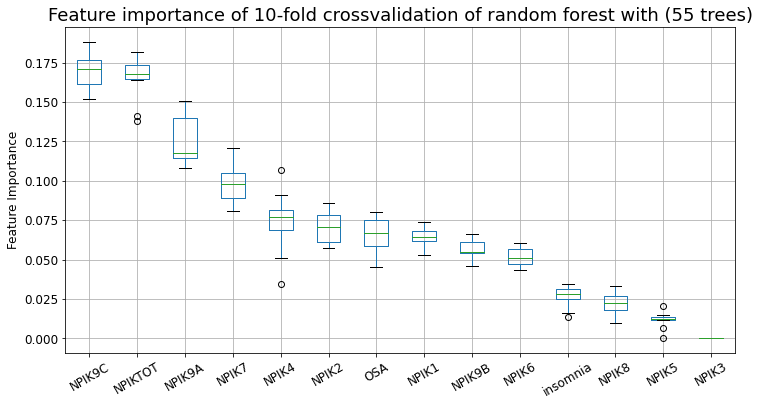

In [14]:
res = usampling_scale_data(df_2g,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators =55, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (55 trees)'
feature_importance(X,y,clf,10,title_label)

In [12]:
models(df_3g,drop_lst,target)

After undersampling data size is 75 ; Resampled dataset shape Counter({'CN-AD': 25, 'CN-CN': 25, 'CN-MCI': 25})

1 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.554, Test set f1-score: 0.235
          - saga_L1, Training set f1-score:0.554, Test set f1-score: 0.235
          - newton-cg_L2, Training set f1-score:0.554, Test set f1-score: 0.235
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.554, Test set f1-score: 0.235
          - saga_L1, Training set f1-score:0.554, Test set f1-score: 0.235
          - newton-cg_L2, Training set f1-score:0.554, Test set f1-score: 0.235
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.554, Test set f1-score: 0.235
          - saga_L1, Training set f1-score:0.554, Test set f1-score: 0.

          - 10trees. f1-score on training data: 0.967 f1-score on test data: 0.415
          - 15trees. f1-score on training data: 1.000 f1-score on test data: 0.415
          - 20trees. f1-score on training data: 1.000 f1-score on test data: 0.563
          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.497
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.356
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.429
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.367
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.356
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.367
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.367
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.441
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.427
    

In [13]:
cv_models(df_3g,drop_lst,target,k)

After undersampling data size is 75 ; Resampled dataset shape Counter({'CN-AD': 25, 'CN-CN': 25, 'CN-MCI': 25})

1 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.143
          - saga_L1, average weighted f1-score of 10-cross validation:0.173
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.143
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.143
          - saga_L1, average weighted f1-score of 10-cross validation:0.181
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.143
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.163
          - saga_L1, average weighted f1-score of 10-cross validation:0.124
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.163
       - C = 1
  

          - 25trees. average weighted f1-score of 10-cross validation:0.420
          - 30trees. average weighted f1-score of 10-cross validation:0.452
          - 35trees. average weighted f1-score of 10-cross validation:0.419
          - 40trees. average weighted f1-score of 10-cross validation:0.445
          - 45trees. average weighted f1-score of 10-cross validation:0.453
          - 50trees. average weighted f1-score of 10-cross validation:0.455
          - 55trees. average weighted f1-score of 10-cross validation:0.452
          - 60trees. average weighted f1-score of 10-cross validation:0.472
          - 65trees. average weighted f1-score of 10-cross validation:0.462
          - 70trees. average weighted f1-score of 10-cross validation:0.484
          - 75trees. average weighted f1-score of 10-cross validation:0.507
          - 80trees. average weighted f1-score of 10-cross validation:0.494
          - 85trees. average weighted f1-score of 10-cross validation:0.514
          - 